<center>
    <h1>
        <font color="blue">Métodos Númericos</font>
    </h1>
    <h3>
        Trabalho 3 - Integração Numérica
    </h3>
    <h3>
        <div style="text-align: right;">
            Carlos Eduardo Cassimiro (402714)
        </div>
    </h3>
    <h2>
        Relatório
    </h2>
</center>

==============================================================================================================

#### Sumário:
1. Métodos
2. Execução dos Testes <br>
2.1 Funções <br>
2.2 Testes Integral pelo Método dos Retângulos <br>
2.3 Testes Integral pelo Método dos Trapézios <br>
2.4 Estimativa dos Erros <br>
3. Comparações os Métodos  <br>
3.1 Comparação para x²+10x-10 <br>
3.2 Comparação para x²-10x+10 <br>
3.3 Comparação para x²-5x-10 <br>
4. Conclusão

==============================================================================================================

## 1. Métodos

In [22]:
# Módulos utilizados
import numpy                          # Numpy para a utilização e funções matemáticas 
import datetime                       # Datetime para utilizar as funções de tempo para regristro desempenho
import pandas                         # Pandas para organizar e exportor os resultados de forma mais legível
import matplotlib.pyplot as mtplot    # Matplotlib.pyplot para exibir o desempenho visualmete de tempo dos métodos
import matplotlib.image as mpimg      # Matplotlib.image para exibir uma imagem de fora do arquivo .ipynb

#### Método da Integração por Retângulos

In [2]:
def integral_retangulo(func, prec, a, b):
    soma = 0
    while a<b:
        soma += func(a)*prec
        a+=prec
    return soma

O cálculo de integrais pelo método da aproximação por retângulos consiste tem estimar a área entre a referida função e o eixo das abscissas pela soma das áreas de n retângulos que possamos alocar entre a função e o eixo das abscissas. Utilizando o cálculo de limites podemos encontrar analiticamente os resultados desejados, entretanto, há casos que a integração analítica é complexa, ou impossível, ou quando o integrando é fornecido como um conjunto discreto de pontos. <br>
O algoritmo do método da aproximação por retângulos é análogo à definição intuitiva de integrais por meio da difinição por limites, entretanto, para uma solução numérica precisamos estimar valores para a larguras dos retângulos. Quanto menor a largura definida para os cálculos dos retângulos, maior vai ser a precisão atingida pelo método, e também mais custoso computacionalmente. <br>
A imprecisão associada a esse método se dá pelas lacunas deixadas por cada retângulo entre a altura do retângulo e o seu f(x+prec) subsequente.

#### Método da Integração por Trapézios

In [3]:
def integral_trapezio(func, prec, a, b):
    soma = 0
    f1 = func(a)
    while a<b:
        f2 = func(a+prec)
        soma+=((f1+f2)/2)*prec
        a+=prec
        f1 = f2
    return soma

O algoritmo do cálculo de integrais pelo método da aproximação por trapézios segue a mesma lógica de aproximação por retângulos, mas ao invés de retângulos usa trapézios com as duas alturas sendo definidas por f(x) e f(x+prec), onde prec é a precisão definida pelo usuário. Dessa maneira, esse método diminui a imprecisão associada existente no método da aproximação da integral pelos retângulos, pois com um triângulo acima do retângulo que compõe o trapézio, a lacuna deixada pelos retângulos no referido método é diminuído.

## 2. Execução dos Testes

### 2.1 Funções

In [4]:
func = lambda x: -1*(x*x) +10*x -10
func2 = lambda x: x*x -10*x +10
func3 = lambda x: x*x -5*x -10

$ func(x) = -x^2+10x-10 $ <br>
$ func2(x) = x^2-10x+10 $ <br>
$ func3(x) = x^2-5x-10 $

### 2.2 Testes Integral pelo Método dos Retângulos

In [5]:
prec = [0.1,0.01,0.001,0.0001,0.00001]       # Precisões utilizadas nos testes

resp1_m1 = []             # Vetor para alocar os resultados do método
tempo1_m1 = []            # Vetor para alocar os tempos desenvolvidos pelo algoriitmo
for i in prec:            # Laço para diminui repetições de código
    inicio = datetime.datetime.now()   # Registro do tempo inicial antes da execução do método
    resp1_m1.append(integral_retangulo(func,i,2,8))  # Aplicação no método na primeira função
    fim = datetime.datetime.now()   # Registro do tempo final da execução
    tempo1_m1.append((fim - inicio).total_seconds())   # Diferente entre o valor de tempo final e inicial em segundos

resp2_m1 = []       # Repetição da estrutura anterior para a segunda função
tempo2_m1 = []
for i in prec:
    inicio = datetime.datetime.now()
    resp2_m1.append(integral_retangulo(func2,i,2,8))
    fim = datetime.datetime.now()
    tempo2_m1.append((fim - inicio).total_seconds())
    
resp3_m1 = []        # Repetição da estrutura anterior para a terceira função
tempo3_m1 = []
for i in prec:
    inicio = datetime.datetime.now()
    resp3_m1.append(integral_retangulo(func3,i,-1,6))
    fim = datetime.datetime.now()
    tempo3_m1.append((fim - inicio).total_seconds())

### 2.3 Testes Integral pelo Método dos Trapézios

In [6]:
resp1_m2 = []        # Repetição da estrutura anterior para o método do trapézio
tempo1_m2 = []
for i in prec:
    inicio = datetime.datetime.now()
    resp1_m2.append(integral_trapezio(func,i,2,8))
    fim = datetime.datetime.now()
    tempo1_m2.append((fim - inicio).total_seconds())

resp2_m2 = []
tempo2_m2 = []
for i in prec:
    inicio = datetime.datetime.now()
    resp2_m2.append(integral_trapezio(func2,i,2,8))
    fim = datetime.datetime.now()
    tempo2_m2.append((fim - inicio).total_seconds())
    
resp3_m2 = []
tempo3_m2 = []
for i in prec:
    inicio = datetime.datetime.now()
    resp3_m2.append(integral_trapezio(func3,i,-1,6))
    fim = datetime.datetime.now()
    tempo3_m2.append((fim - inicio).total_seconds())

### 2.4 Estimativa dos Erros

In [7]:
#Estimativas de Erro Absoluto para a função -x²+10x-10
erro_abs1_m1 = [abs(x-72) for x in abs(numpy.array(resp1_m1))]
erro_abs1_m2 = [abs(x-72) for x in abs(numpy.array(resp1_m2))]

#Estimativas de Erro Absoluto para a função x²-10x+10
erro_abs2_m1 = [abs(x-72) for x in abs(numpy.array(resp2_m1))]
erro_abs2_m2 = [abs(x-72) for x in abs(numpy.array(resp2_m2))]

#Estimativas de Erro Absoluto para a função x²-5x-10
erro_abs3_m1 = [abs(x-85.16666) for x in abs(numpy.array(resp3_m1))]
erro_abs3_m2 = [abs(x-85.16666) for x in abs(numpy.array(resp3_m2))]

# Os resultados comparados foram obtidos pela relosução do site Symblob:
# https://pt.symbolab.com/solver/step-by-step/%5Cint_%7B2%7D%5E%7B8%7D%20%5Cleft(-x%5E%7B2%7D%2B10x-10%5Cright)dx
# https://pt.symbolab.com/solver/step-by-step/%5Cint_%7B2%7D%5E%7B8%7D%20%5Cleft(x%5E%7B2%7D-10x%2B10%5Cright)dx
# https://pt.symbolab.com/solver/step-by-step/%5Cint_%7B-1%7D%5E%7B6%7D%20%5Cleft(x%5E%7B2%7D-5x-10%5Cright)dx

## 3. Comparações os Métodos
### 3.1 Comparação para x²+10x-10
#### Gráfico dos Tempos

<IPython.core.display.Javascript object>


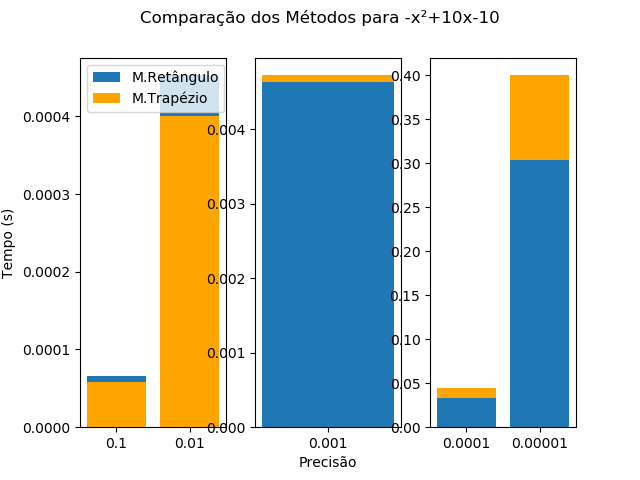

In [20]:
%matplotlib notebook
mtplot.figure(1)
mtplot.suptitle("Comparação dos Métodos para -x²+10x-10")
mtplot.subplot(131)
mtplot.bar(["0.1","0.01"],tempo1_m1[0:2])
mtplot.bar(["0.1","0.01"],tempo1_m2[0:2], color='orange')
mtplot.legend(['M.Retângulo','M.Trapézio'],loc=2)
mtplot.ylabel("Tempo (s)")
mtplot.subplot(132)
mtplot.bar("0.001",tempo1_m2[2], color='orange')
mtplot.bar("0.001",tempo1_m1[2])
mtplot.xlabel("Precisão")
mtplot.subplot(133)
mtplot.bar(["0.0001","0.00001"],tempo1_m2[3:5], color='orange')
mtplot.bar(["0.0001","0.00001"],tempo1_m1[3:5])
mtplot.show()

Obs: Acabei desenvolvendo os gráficos dessa maneira pois as escalas são muito diferentes, diminuindo demais os gráficos dos testes com as menores precisões que executam mais rápido.

#### Resultados das Aproximações

In [9]:
pandas.DataFrame([resp1_m1, resp1_m2], columns=prec, index=["M.Retângulo","M.Trapézio"])

,0.10000,0.01000,0.00100,0.00010,0.00001
M.Retângulo,72.5900,72.0599,71.999999,72.0006,72.00006
M.Trapézio,72.5595,72.0596,71.999999,72.0006,72.00006


#### Erro Absoluto

In [10]:
pandas.DataFrame([erro_abs1_m1, erro_abs1_m2], columns=prec, index=["M.Retângulo","M.Trapézio"])

,0.10000,0.01000,0.00100,0.00010,0.00001
M.Retângulo,0.5900,0.0599,0.000001,0.0006,0.00006
M.Trapézio,0.5595,0.0596,0.000001,0.0006,0.00006


#### Tempos

In [11]:
pandas.DataFrame([tempo1_m1, tempo1_m2], columns=prec, index=["M.Retângulo","M.Trapézio"])

,0.10000,0.01000,0.00100,0.00010,0.00001
M.Retângulo,0.000066,0.000453,0.004639,0.032859,0.303599
M.Trapézio,0.000058,0.000400,0.004727,0.044248,0.399881


Pelo gráfico podemos observar que, para a primeira função, as diferenças de tempo de execução não foram tão distantes, onde, no geral, o método do trapézio acabou levando mais tempo que o método do retângulo. Analisando o erro absoluto, os resultados foram praticamente iguais.

### 3.2 Comparação para x²-10x+10
#### Gráfico dos Tempos

<IPython.core.display.Javascript object>


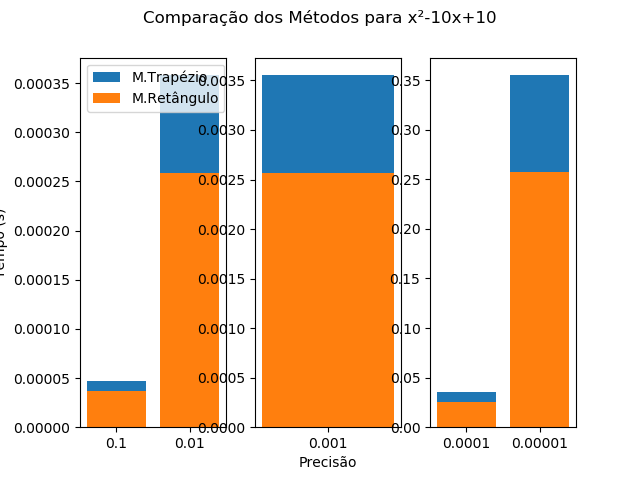

In [33]:
%matplotlib notebook
mtplot.figure(2)
mtplot.suptitle("Comparação dos Métodos para x²-10x+10")
mtplot.subplot(131)
mtplot.bar(["0.1","0.01"],tempo2_m2[0:2])
mtplot.bar(["0.1","0.01"],tempo2_m1[0:2])
mtplot.legend(['M.Trapézio','M.Retângulo'],loc=2)
mtplot.ylabel("Tempo (s)")
mtplot.subplot(132)
mtplot.bar("0.001",tempo2_m2[2])
mtplot.bar("0.001",tempo2_m1[2])
mtplot.xlabel("Precisão")
mtplot.subplot(133)
mtplot.bar(["0.0001","0.00001"],tempo2_m2[3:5])
mtplot.bar(["0.0001","0.00001"],tempo2_m1[3:5])
mtplot.show()

#### Resultados das Aproximações

In [13]:
pandas.DataFrame([resp2_m1, resp2_m2], columns=prec, index=["M.Retângulo","M.Trapézio"])

,0.10000,0.01000,0.00100,0.00010,0.00001
M.Retângulo,-72.5900,-72.0599,-71.999999,-72.0006,-72.00006
M.Trapézio,-72.5595,-72.0596,-71.999999,-72.0006,-72.00006


#### Erro Absoluto


In [14]:
pandas.DataFrame([erro_abs2_m1, erro_abs2_m2], columns=prec, index=["M.Retângulo","M.Trapézio"])

,0.10000,0.01000,0.00100,0.00010,0.00001
M.Retângulo,0.5900,0.0599,0.000001,0.0006,0.00006
M.Trapézio,0.5595,0.0596,0.000001,0.0006,0.00006


#### Tempos

In [15]:
pandas.DataFrame([tempo2_m1, tempo2_m2], columns=prec, index=["M.Retângulo","M.Trapézio"])

,0.10000,0.01000,0.00100,0.00010,0.00001
M.Retângulo,0.000037,0.000259,0.002566,0.025684,0.256902
M.Trapézio,0.000047,0.000358,0.003553,0.035490,0.354912


Nos testes da segunda função, os valores valores dos erros absolutos foram quase que exatamente iguais, entretanto, o tempo desenvolvidos entre os algoritmos se mostrou maior no método do trapézio em todos os casos de precisões.

### 3.3 Comparação para x²-5x-10

<IPython.core.display.Javascript object>


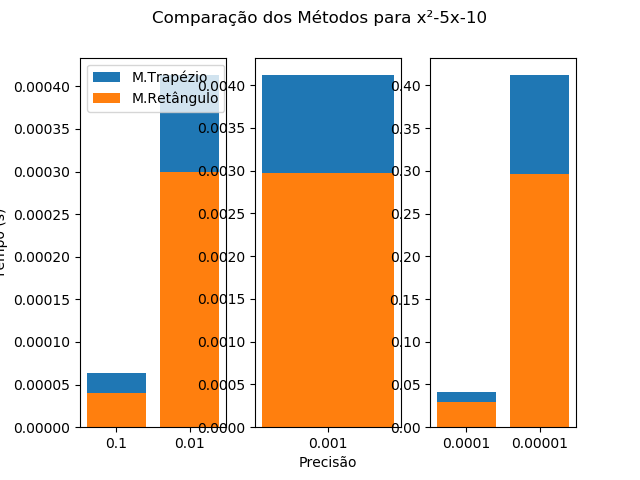

In [16]:
%matplotlib notebook
mtplot.figure(3)
mtplot.suptitle("Comparação dos Métodos para x²-5x-10")
mtplot.subplot(131)
mtplot.bar(["0.1","0.01"],tempo3_m2[0:2])
mtplot.bar(["0.1","0.01"],tempo3_m1[0:2])
mtplot.legend(['M.Trapézio','M.Retângulo'],loc=2)
mtplot.ylabel("Tempo (s)")
mtplot.subplot(132)
mtplot.bar("0.001",tempo3_m2[2])
mtplot.bar("0.001",tempo3_m1[2])
mtplot.xlabel("Precisão")
mtplot.subplot(133)
mtplot.bar(["0.0001","0.00001"],tempo3_m2[3:5])
mtplot.bar(["0.0001","0.00001"],tempo3_m1[3:5])
mtplot.show()

#### Resultados das Aproximações

In [17]:
pandas.DataFrame([resp3_m1, resp3_m2], columns=prec, index=["M.Retângulo","M.Trapézio"])

,0.10000,0.01000,0.00100,0.00010,0.00001
M.Retângulo,-85.5550,-85.20655,-85.166666,-85.167067,-85.166707
M.Trapézio,-85.5195,-85.20620,-85.166666,-85.167067,-85.166707


#### Erro Absoluto

In [18]:
pandas.DataFrame([erro_abs3_m1, erro_abs3_m2], columns=prec, index=["M.Retângulo","M.Trapézio"])

,0.10000,0.01000,0.00100,0.00010,0.00001
M.Retângulo,0.38834,0.03989,0.000006,0.000407,0.000047
M.Trapézio,0.35284,0.03954,0.000006,0.000407,0.000047


#### Tempos

In [19]:
pandas.DataFrame([tempo3_m1, tempo3_m2], columns=prec, index=["M.Retângulo","M.Trapézio"])

,0.10000,0.01000,0.00100,0.00010,0.00001
M.Retângulo,0.000040,0.000299,0.002969,0.029652,0.296338
M.Trapézio,0.000064,0.000413,0.004116,0.041129,0.412023


Nos testes da terceira função, novamente os valores de tempo desenvolvidos nos testes com o método do trapézio levaram mais tempo que o método do retângulo, entretanto, nessa função foi possível notar uma maior precisão pelo método do trapézio.

#### Outro teste

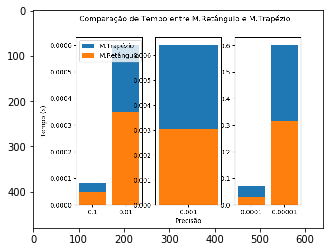

In [31]:
%matplotlib inline
img = mpimg.imread('img1.png')
mtplot.imshow(img)
mtplot.show()

In [32]:
def integral_trapezio(func, prec, a, b):
    soma = 0
    while a<b:
        soma+=((func(a)+func(a+prec))/2)*prec
        a+=prec
    return soma

Em uma primeira implementação do método do trapézio, os tempos desenvolvidos por ela eram praticamente o dobro do que o tempo desenvolvido pelo método do retângulo, então resolvi tantar otimizar o algoritmo para a versão apresentada nos testes. O motivo do maior custo foi a execução repetida de 'func(a)', pois a cada iteração o 'func(a)' posterior será o 'func(a+prec)' já calculado.

## 4. Conclusão

Os dois métodos possuem uma implementação simples, intuitiva e consequente implementação prática. Para as três funções testadas, os resultados de precisão mostraram-se bem semelhantes em ambos os métodos, onde somente na terceira função foi motivo visualizar alguma diferença mais sútil. Entretanto, em quase totalidade dos testes, o método do retângulo mostrou-se menos custoso computacionalmente com os menores tempos apresentados. <br>
Deixa maneira, podemos observar que o método do retângulo possui um custo benefício melhor do que o método do trápezio para essas funções testadas, desempenhando melhores tempos por resultadores muito semelhantes aos do método do trapézio. Entretanto, o método do trapézio pode ser mais interessante para algumas funções mais complexas na busca de resultados mais precisos.